In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [13]:
deposit=pd.read_csv("Bank-full.csv")
deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
deposit.drop(["contact"],inplace=True,axis=1)
deposit.drop(["education"],inplace=True,axis=1)
deposit.drop(["default"],inplace=True,axis=1)

In [15]:
deposit

,age,job,marital,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,668,no,no,17,nov,508,4,-1,0,unknown,no


In [16]:
deposit.shape

(45211, 14)

In [17]:
deposit=pd.get_dummies(deposit,columns=['job','marital','housing','loan','month','poutcome','y'],drop_first=True)

In [18]:
deposit

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
X=deposit.iloc[:,0:20]
Y=deposit.iloc[:,-1]

In [31]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=classifier.predict(X)

In [33]:
y_pred_df=pd.DataFrame({'actual':Y,
                       'predicted_proba':classifier.predict(X)})

In [34]:
y_pred_df

,actual,predicted_proba
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39298   624]
 [ 4435   854]]


In [36]:
((39298+854)/(39298+624+4435+854))*100

88.81024529428679

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

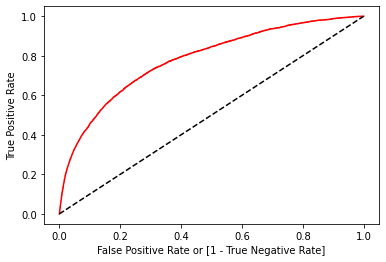

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [39]:
auc

0.5729183583162057